# CelebA - Exploratory Data Analysis for GANs

In the following, we perform an EDA on the CelebA dataset.

Since we are not interested in performing classification, we don't necessarily care about looking for discriminative features, but rather we simply take a look at the number of occurrences of each annotation.

## Setting up the environment

### Importing modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Loading the dataset (annotations only)

In [57]:
data = pd.read_csv("data/list_attr_celeba.csv")
data = data.drop("Image_Name", axis=1)  # drop the first column
data.head() # display the first n=5 rows


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
tot_images = len(data.index)
print("Total number of images:", tot_images)


Total number of images: 202599


## Counting occurrences of each annotation

In [58]:
counts = data.apply(pd.value_counts)
display(counts)
# 1 means the image is labeled as having that attribute


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,180083,148509,98766,161153,198052,171890,153814,155083,154127,172616,...,191150,104930,160377,137855,164323,192781,106884,177686,187867,45865
1,22516,54090,103833,41446,4547,30709,48785,47516,48472,29983,...,11449,97669,42222,64744,38276,9818,95715,24913,14732,156734


We now take the second row only, since it gives us the number of times an image has been classified as having that attribute, and we plot the occurrences in descending order

<AxesSubplot:>

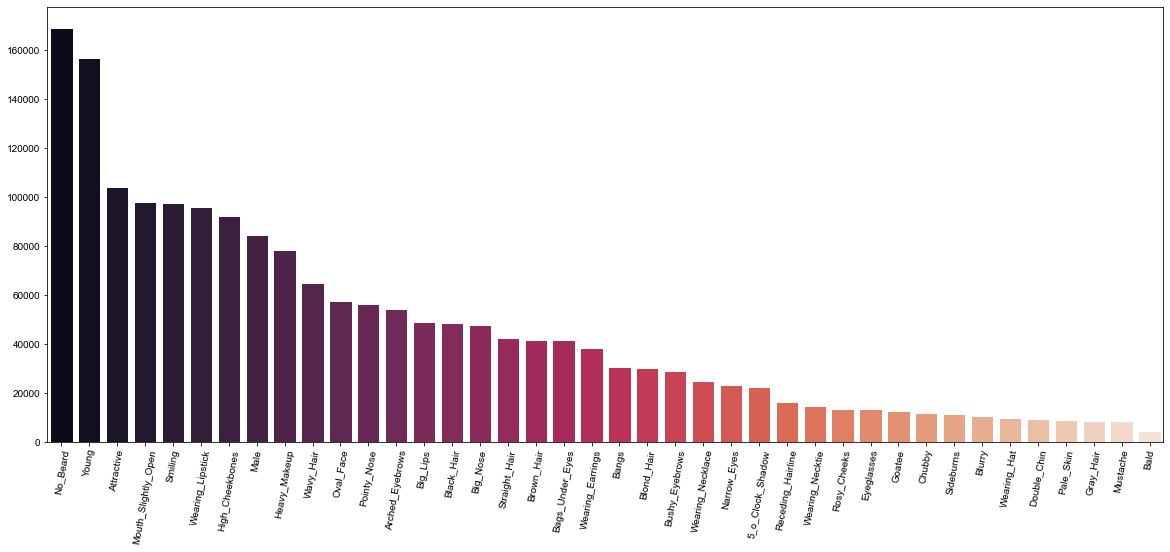

In [5]:
labeled_as_1 = counts.iloc[lambda x: x.index == 1]  # take only the row labeled as 1
descending_counts_pairs = sorted(
    zip(labeled_as_1.values.flatten(), labeled_as_1.columns), reverse=True
)   # sort annotations by descending frequency
x = [x for _, x in descending_counts_pairs] # unzip annotations
y = [y for y, _ in descending_counts_pairs] # unzip counts

plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
sns.set_style("whitegrid")
sns.barplot(x=x, y=y, palette="rocket")


It could also be useful to take a look at the occurrences in terms of percentage over the total number of images

ValueError: Value for `orient` not understood: auto

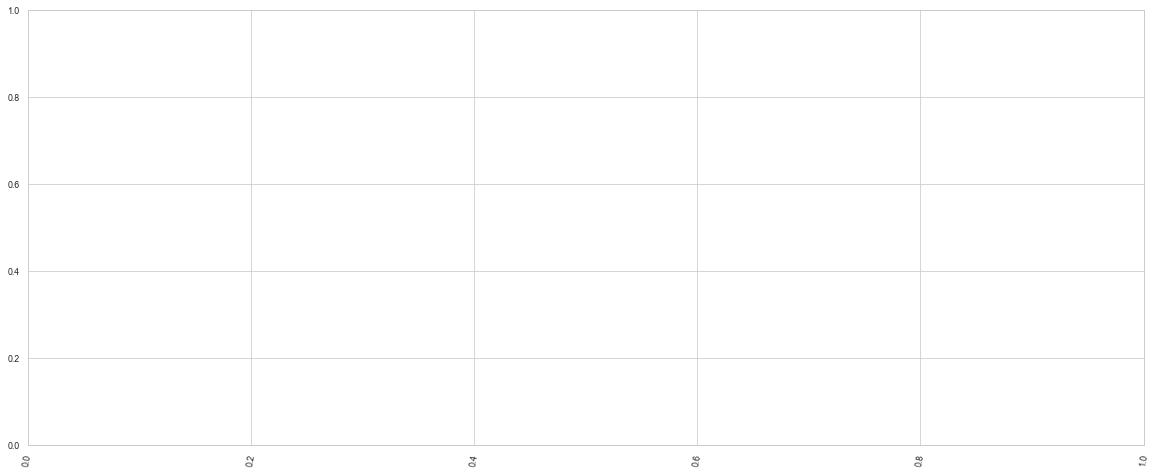

In [119]:
y_percentage = [(count / tot_images) * 100 for count in y]
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
sns.barplot(y=x, x=y_percentage, palette="viridis").get_figure().savefig("results/dataset/att_distribution.pdf")

We can immediately see that the dataset tends to have mostly young people without beard.

Only a few attributes appear to be balanced (around 50%), like being 'Attractive' or 'Smiling'.

We also notice that the dataset is a bit skewed towards females' images, as the 'Male' attribute only reaches around 40%.

Finally, both people wearing 'Eyeglasses' and having 'Mustache' appear in less than 10% of the images.

As such, either of those could very well be chosen as our target domain, while the rest of the dataset (sub-sampled, if need be) could be considered as our source domain.

## Visualizing correlation between attributes

Finally, even though this isn't really necessary for the sake of our application, we take a look at the correlation matrix between the 40 annotations.

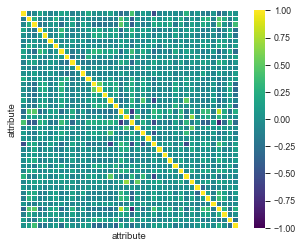

In [115]:
#_, ax = plt.subplots(figsize=(20, 20))
#sns.set_context("paper")
sns.heatmap(data.corr(), linewidths=0.5, square=True, xticklabels=False, yticklabels=False,  cmap="viridis", vmin=-1).get_figure().savefig("results/dataset/correlation.pdf")


Only a few pairs are positively correlated, like ('Heavy_Makeup', 'Wearing_Lipstick') and ('Smiling','High_Cheekbones'), while most annotations aren't.

Also, it's important to notice that 'No_Beard' and 'Mustache' (or similar) are negatively correlated. As such, if our intention is to set 'Mustaches' to 1, we should also take care to change 'No_Beard' to 0.